In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob 
os.chdir(r'D:\datos_GPetersii\datos_GPetersii\velocity_histogram')
files = glob.glob('*.txt')
files

['bins_p1.txt',
 'bins_p2.txt',
 'bins_p3.txt',
 'bins_p4.txt',
 'bins_p5.txt',
 'bins_p6.txt',
 'bins_p7.txt']

In [5]:
time_high_vel = pd.DataFrame()
for file in files:
    time_high_vel[file[:-4]] = np.loadtxt(file)

time_high_vel.head()

,bins_p1,bins_p2,bins_p3,bins_p4,bins_p5,bins_p6,bins_p7
0,3677.52,119.56,6.92,37774.44,131.98,3.12,NaN
1,19514.88,749.82,NaN,66619.86,621.60,NaN,NaN
2,13035.60,1276.62,NaN,106265.18,469.02,15.70,20.96
3,21266.60,3122.72,NaN,143935.48,337.96,NaN,NaN
4,24605.52,8926.40,1080.00,251475.10,416.58,102.32,NaN


In [56]:
for col in time_high_vel.columns:
    total = np.sum(time_high_vel[col])
    new_col = np.divide(time_high_vel[col], total) * 100

    time_high_vel[col] = new_col

In [66]:
time_high_vel = time_high_vel.iloc[1:, :]

In [116]:
melted = time_high_vel.iloc[:,:7].reset_index().melt(id_vars='index')
melted

,index,variable,value
0,1,bins_p1,3.141363
1,2,bins_p1,2.098376
2,3,bins_p1,3.423342
3,4,bins_p1,3.960817
4,5,bins_p1,4.751801
...,...,...,...
198,25,bins_p7,NaN
199,26,bins_p7,NaN
200,27,bins_p7,NaN
201,28,bins_p7,NaN


c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarn

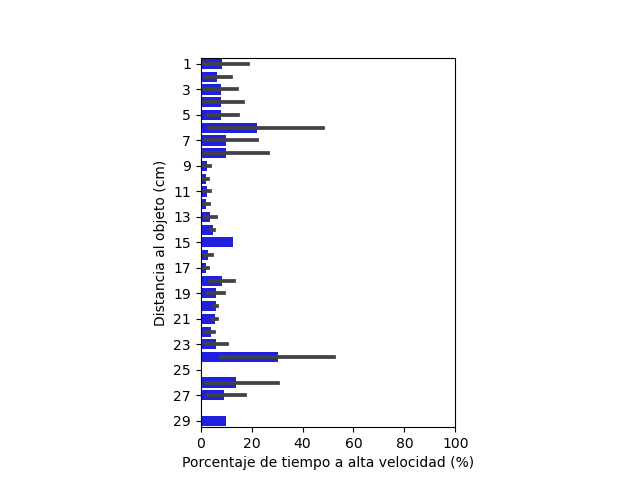

In [117]:
%matplotlib widget
fig, ax = plt.subplots()
sns.barplot(data=melted,
             y='index',
             x = 'value', 
             color='b',
             orient='h'
             )
ax.set(xlim=[0,100], yticks=np.arange(0,30,2), ylabel='Distancia al objeto (cm)', xlabel='Porcentaje de tiempo a alta velocidad (%)')
ax.set_aspect(5)
#fig.savefig(fname='vel_hist.svg', format='svg')

In [114]:
!pip install scikit-posthocs

In [118]:
import scikit_posthocs as sp
p_values = sp.posthoc_dunn(melted,  group_col='index', val_col='value')

print(p_values)

          1         2         3         4         5         6         7   \
1   1.000000  0.915991  0.947217  0.877741  0.856719  0.839775  0.985595   
2   0.915991  1.000000  0.858718  0.956892  0.761683  0.730860  0.900314   
3   0.947217  0.858718  1.000000  0.820926  0.908960  0.896836  0.961599   
4   0.877741  0.956892  0.820926  1.000000  0.725124  0.690604  0.862171   
5   0.856719  0.761683  0.908960  0.725124  1.000000  0.996493  0.870914   
6   0.839775  0.730860  0.896836  0.690604  0.996493  1.000000  0.855267   
7   0.985595  0.900314  0.961599  0.862171  0.870914  0.855267  1.000000   
8   0.942426  0.978961  0.889906  0.940438  0.800443  0.778484  0.928068   
9   0.704569  0.756664  0.656057  0.793694  0.575675  0.536885  0.691208   
10  0.623898  0.664778  0.581205  0.697135  0.510864  0.475112  0.612120   
11  0.732541  0.784980  0.686919  0.819102  0.610817  0.579788  0.719996   
12  0.682825  0.730052  0.638424  0.763475  0.564770  0.531370  0.670598   
13  0.885151

c:\Users\Compras\anaconda3\Lib\site-packages\scikit_posthocs\_posthocs.py:346: RuntimeWarning: divide by zero encountered in divide
  B = (1. / x_lens.loc[i] + 1. / x_lens.loc[j])
